# Задание 6
Решить краевую задачу для линейного ОДУ 2-го порядка методом стрельбы или методом конечных разностей. Построить график решения.

## Теория

Здесь и далее под краевой задачей мы понимаем тип дифференциальных уравнений:
$$x''=f(t,x,x'),~a\leq t\leq b$$
с граичными условиями $x(a)=\alpha,~x(b)=\beta$.

Линейная краевая задача залается в виде:
$$x''=p(t)x'(t)+q(t)x(t)+r(t),~x(a)=\alpha,~x(b)=\beta.$$



### Метод пристрелки

Сведем задачу к двум задачам Коши. Первая задача для функции $u(t)$ имеет вид:
$$u''=p(t)u'(t)+q(t)u(t)+r(t),$$
$$u(a)=\alpha,~u'(a)=0.$$
Вторая задача для функции $v(t)$ имеет вид:
$$v''=p(t)v'(t)+q(t)v(t),$$
$$v(a)=0,~v'(a)=1.$$
Их линейная комбинация:
$$x(t)=u(t)+Cv(t)$$
является решением оригинального уравнения.

Используя условие на $b$ получаем, что финальное выражение выписывается в виде:
$$x(t)=u(t)+\frac{\beta-u(b)}{v(b)}v(t)$$
Для решения промежуточных задач Коши будет использован метод Рунге-Кутта.

### Метод конечных разностей

Воспользуемся приближениями произвдных при помощи конечных разностей:
$$x'(t_j)=\frac{x(t_{j+1})-x(t_{j-1})}{2h},$$
$$x''(t_j)=\frac{x(t_{j+1})-2x(t_j)+x(t_{j+1})}{h^2},$$
где $h$ -- шаг разбиения.
Полученные приближения подставим в оригинальную задачу. С небольшими переобозначениями, получим:
$$\left(\frac{-h}{2}p_j-1\right)x_{j-1}+(2+h^2q_j)x_j+\left(\frac{h}{2}p_j-1\right)x_{j+1}=-h^2r_j$$
Данную задачу можно переписать в матричном виде (репрезентация ниже сокращена для удобства):
$$\left(\begin{matrix}
2 + h^2q_1 & \frac{h}{2}p_1-1 & 0 & 0 & 0 \\
\frac{-h}{2}p_2-1 & 2+h^2q_2 & \frac{h}{2}p_2-1 & 0 & 0 \\
0 & \frac{-h}{2}p_j-1 & 2+h^2q_j & \frac{h}{2}p_j-1 & 0 \\
0 & 0 & \frac{-h}{2}p_{N-2}-1 & 2+h^2q_{N-2} & \frac{h}{2}p_{N-2}-1 \\
0 & 0 & 0 & \frac{-h}{2}p_{N-1}-1 & 2+h^2q_{N-1}
\end{matrix}\right)\left(\begin{matrix}
x_1 \\ x_2 \\ x_j \\ x_{N-2} \\ x_{N-1}
\end{matrix}\right)=$$
$$=\left(\begin{matrix}
-h^2r_1 + e_0 \\ -h^2r_2 \\ -h^2r_j \\ -h^2r_{N-2} \\ -h^2r_{N-1}+e_N
\end{matrix}\right),$$
где 
$$e_0=\left(\frac{h}{2}p_1+1\right)\alpha,~e_N=\left(\frac{-h}{2}p_{N-1}+1\right)\beta.$$

## Код

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Взял отсюда:
# https://perso.crans.org/besson/publis/notebooks/Runge-Kutta_methods_for_ODE_integration_in_Python.html
# (в scipy нельзя задать фиксированный шаг)
def rungekutta4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

Решим задачу:
$$x''(t)=\frac{2t}{1+t^2}x'(t)-\frac{2}{1+t^2}x(t)+1$$
с граничными условиями $x(0)=1.25,~x(4)=-0.95$ на интервале $[0;4]$.
Функции $p(t),~q(t),~r(t)$ выписываются в виде:
$$p(t) = \frac{2t}{1+t^2},~q(t) = -\frac{2}{1+t^2},~r(t)=1.$$

### Метод пристрелки

Задачи Коши будут записаны в виде:
$$u''=\frac{2t}{1+t^2}u'(t)-\frac{2}{1+t^2}u(t)+1,$$
$$u(0)=1.25,~u'(0)=0,$$
$$v''=\frac{2t}{1+t^2}v'(t)-\frac{2}{1+t^2}v(t),$$
$$v(0)=0,~v'(0)=1.$$
Составим системы для таких задач Коши, сделав замены:
$$u_1=u(t),~u_2=u'(t),$$
$$v_1=u(t),~v_2=u'(t).$$
Тогда, задачи Коши могут быть переписаны в виде систем первого порядка:
$$\left\{\begin{matrix}
u_1'=u_2, \\
u_2'=\frac{2t}{1+t^2}u_2-\frac{2}{1+t^2}u_1+1
\end{matrix}\right.$$
$$u_1(0)=1.25,~u_2(0)=0,$$
$$\left\{\begin{matrix}
v_1'=v_2, \\
v_2'=\frac{2t}{1+t^2}v_2-\frac{2}{1+t^2}v_1
\end{matrix}\right.$$
$$v_1(0)=0,~v_2(0)=1,$$

In [3]:
# Задаем формулы для u_{1,2} и v_{1,2}
def u(y, t):
    return np.array([y[1], (2*t)/(1+t**2)*y[1]-(2)/(1+t**2)*y[0]+1])
def v(y, t):
    return np.array([y[1], (2*t)/(1+t**2)*y[1]-(2)/(1+t**2)*y[0]])

# Начальные значения
u0 = np.array([1.25, 0])
v0 = np.array([0, 1])

# Массив времени
time = np.linspace(0, 4, 25)

# Решение с помощью метода Рунге-Кутта
u_solution = rungekutta4(u, u0, time)
v_solution = rungekutta4(v, v0, time)

Вычисляем константу $C$ через формулу:
$$C = \frac{\beta-u(b)}{v(b)}$$

In [4]:
C = (-0.95-u_solution[-1,0])/v_solution[-1,0]
C

0.48598919921016775

Получим финальное решение в виде:
$$x(t)=u(t)+\frac{\beta-u(b)}{v(b)}v(t),$$
И изобразим всё на графике. Настоящее решение имеет вид:
$$x(t) = 1.25 + 0.486t-2.25t^2+2t\arctan(t)-\frac{1}{2}\ln(1+t^2)+\frac{1}{2}t^2\ln(1+t^2)$$

In [5]:
x_solution = u_solution[:,0]+C*v_solution[:,0]

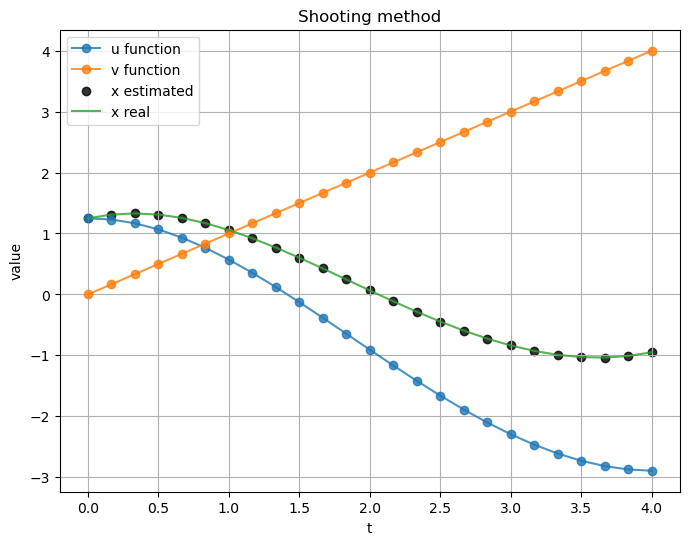

In [6]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(time, u_solution[:,0], marker = 'o', label = "u function", alpha = 0.8)
ax.plot(time, v_solution[:,0], marker = 'o', label = "v function", alpha = 0.8)
ax.scatter(time, x_solution, label = "x estimated", alpha = 0.8, c = 'black')
ax.plot(time, 
        1.25+0.486*time-2.25*time**2+2*time*np.arctan(time)-1/2*np.log(1+time**2)\
            +1/2*time**2*np.log(1+time**2),
        label = "x real", alpha = 0.8)

ax.set_title("Shooting method")
ax.set_xlabel("t")
ax.set_ylabel("value")
ax.grid()
ax.legend()

plt.show()

### Метод конечных разностей

Вычислим вектора постоянных, вектора трех диагоналей, составим матричное уравнение и решим его

In [7]:
# Задаем функции
def p(t):
    return 2*t/(1+t**2)
def q(t):
    return -2/(1+t**2)
def r(t):
    return t*0+1

In [8]:
# Задаем переменные и массивы
num_dots = 25
time = np.linspace(0,4,num_dots)
h = time[1]-time[0]
B_vector = np.zeros(num_dots-2)

# Вычисление вектора постоянных
B_vector = -h**2*r(time)[1:-1]
B_vector[0] += (1+h/2*p(time[1]))*1.25
B_vector[-1] += (1-h/2*p(time[-2]))*(-0.95)

# Вычисление диагоналей
diag_1_vector = 2+h**2*q(time[1:-1])
diag_2_vector = h/2*p(time[1:-2])-1
diag_3_vector = -h/2*p(time[2:-1])-1

# Составляем матрицу
C_matrix = np.diag(diag_1_vector) + np.diag(diag_2_vector,1) +\
      np.diag(diag_3_vector,-1)

In [9]:
print(f'{C_matrix[:4,:5]}')
print(f'{C_matrix.shape=}')

[[ 1.94594595 -0.97297297  0.          0.          0.        ]
 [-1.05        1.95       -0.95        0.          0.        ]
 [ 0.         -1.06666667  1.95555556 -0.93333333  0.        ]
 [ 0.          0.         -1.07692308  1.96153846 -0.92307692]]
C_matrix.shape=(23, 23)


In [10]:
X = np.matmul(np.linalg.inv(C_matrix),B_vector)
X = np.insert(X, [0,len(X)], [1.25, -0.95])
X

array([ 1.25      ,  1.3086166 ,  1.32633814,  1.30535759,  1.24898185,
        1.16126183,  1.04666183,  0.90981146,  0.75534036,  0.58777752,
        0.41149536,  0.2306826 ,  0.04933467, -0.12874552, -0.29994108,
       -0.46081163, -0.60808256, -0.7386339 , -0.84948946, -0.93780648,
       -1.00086599, -1.0360638 , -1.04090236, -1.01298318, -0.95      ])

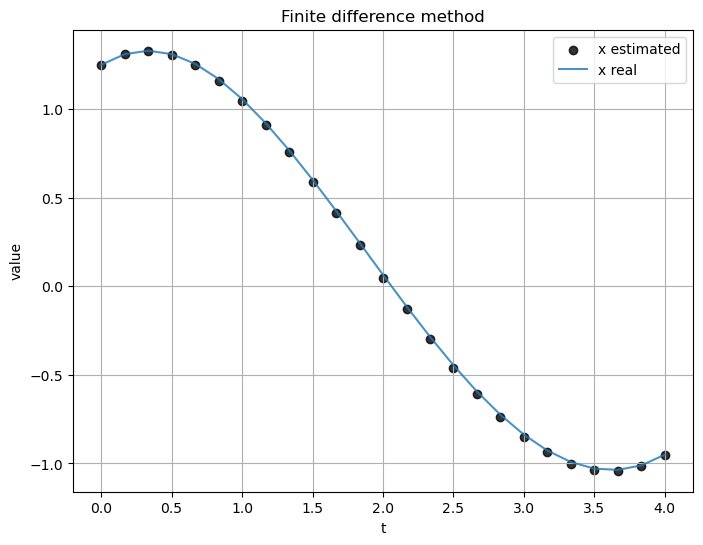

In [11]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.scatter(time, X, label = "x estimated", alpha = 0.8, c = 'black')
ax.plot(time, 
        1.25+0.486*time-2.25*time**2+2*time*np.arctan(time)-1/2*np.log(1+time**2)\
            +1/2*time**2*np.log(1+time**2),
        label = "x real", alpha = 0.8)

ax.set_title("Finite difference method")
ax.set_xlabel("t")
ax.set_ylabel("value")
ax.grid()
ax.legend()

plt.show()